In [1]:
%matplotlib inline
import sys
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [ ]:
# Notebook to plot (a) the domains map and (b) the strength maps

# We show the domains maps for two different parameters alpha
# (a) alpha = 0.01
# (b) alpha = 0.05

In [2]:
# Import the latitudes and longitudes

import netCDF4
from netCDF4 import Dataset
def importNetcdf(path,variable_name):
    nc_fid = Dataset(path, 'r')
    field = nc_fid.variables[variable_name][:]     
    return field 

path = '../Data/COBEv2_ssta.nc'

lon = importNetcdf(path,'lon')
lat = importNetcdf(path,'lat')

## Alpha = 0.01

In [5]:
# Import the domains map
path_domains_map = '../outputs/domain_identification/domain_maps.npy'
d_maps = np.load(path_domains_map)

In [8]:
# 29 domains
d_maps.shape

(29, 60, 180)

In [15]:
# in each domain map d_maps[i], points belonging to the domain are == 1
# if not in the domains they are equal to 0.

# define a single domain map

domain_map = np.zeros((d_maps.shape[1], d_maps.shape[2]))
i = 1
for d in range(len(d_maps)):
    domain_map[d_maps[d] == 1] = i;
    i += 1

In [ ]:
# Note: domain_map is a single map with all domains. Different numbers are assigned to
# different domains. Numbers do not mean anything and are only used to differentiate domains.

In [19]:
domain_map[domain_map==0] = np.nan

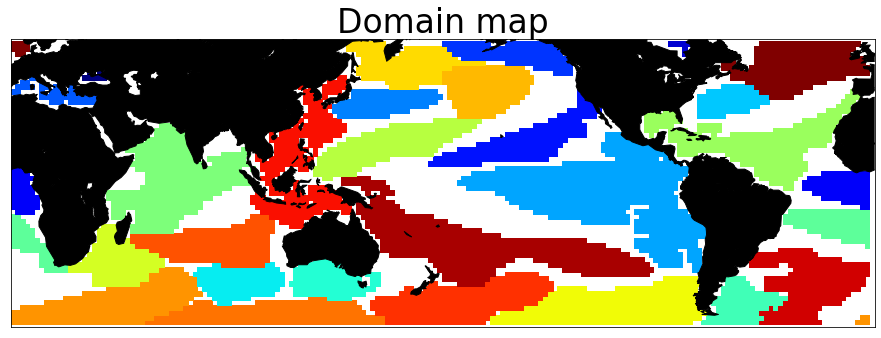

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
    
vmin = 0
vmax = np.sort(strengts[:,1])[-2]
    
map = Basemap(projection='cyl',
              llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=0,urcrnrlon=360)
map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
map.fillcontinents(color = 'black')
    
    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(lon,lat,domain_map,cmap=plt.cm.jet)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
    
plt.title('Domain map', fontsize = 33)

plt.show()
fig.savefig('./domain_map',bbox_inches='tight') # bbox_inches='tight'

In [3]:
# Import the strength map
path_strength_map = '../outputs/network_inference/strength_map.npy'
s_map = np.load(path_strength_map)

In [4]:
# Import the domains strengths
path_strengths = '../outputs/network_inference/strength_list.npy'
strengts = np.load(path_strengths)

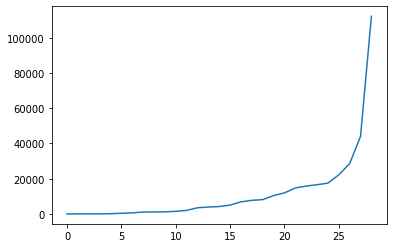

In [5]:
# Sort them and plot them
plt.plot(np.sort(strengts[:,1]))

In [12]:
s_map[s_map==0] = np.nan

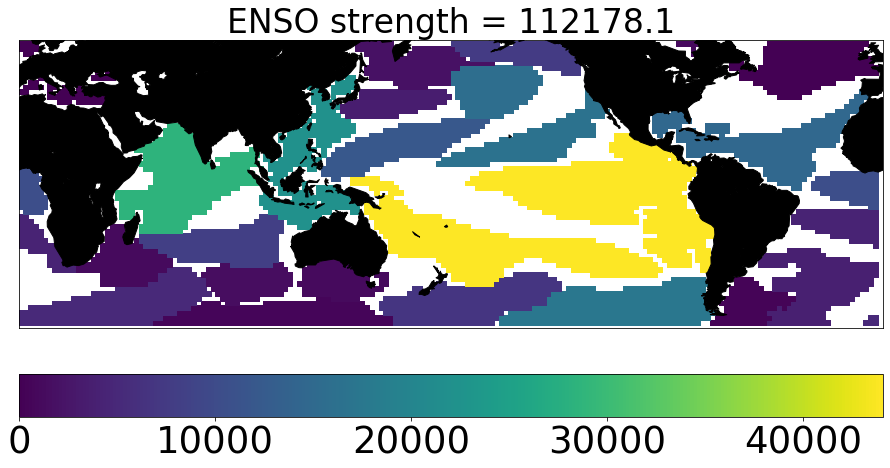

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
    
vmin = 0
vmax = np.sort(strengts[:,1])[-2]
    
map = Basemap(projection='cyl',
              llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=0,urcrnrlon=360)
map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
map.fillcontinents(color = 'black')
    
    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(lon,lat,s_map,cmap=plt.cm.viridis,vmin=0,vmax= vmax)
cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
cb.ax.tick_params(labelsize=37)
    
plt.title('ENSO strength = '+str(round(np.sort(strengts[:,1])[-1],1)), fontsize = 33)

plt.show()
fig.savefig('./strength_map',bbox_inches='tight') # bbox_inches='tight'

## alpha = 0.05

In [3]:
# Import the domains map
path_domains_map = '../outputs/domain_identification/domain_maps.npy'
d_maps = np.load(path_domains_map)

In [4]:
# in each domain map d_maps[i], points belonging to the domain are == 1
# if not in the domains they are equal to 0.

# define a single domain map

domain_map = np.zeros((d_maps.shape[1], d_maps.shape[2]))
i = 1
for d in range(len(d_maps)):
    domain_map[d_maps[d] == 1] = i;
    i += 1

In [5]:
domain_map[domain_map==0] = np.nan

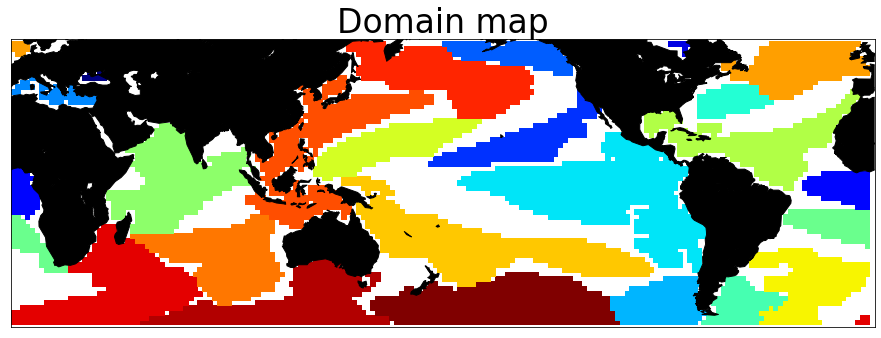

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
    
#vmin = 0
#vmax = np.sort(strengts[:,1])[-2]
    
map = Basemap(projection='cyl',
              llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=0,urcrnrlon=360)
map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
map.fillcontinents(color = 'black')
    
    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(lon,lat,domain_map,cmap=plt.cm.jet)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
    
plt.title('Domain map', fontsize = 33)

plt.show()
#fig.savefig('./domain_map',bbox_inches='tight') # bbox_inches='tight'